<img style="padding-right: 25px;" src= "https://raw.githubusercontent.com/e-sensing/sits/master/inst/extdata/sticker/sits_sticker.png" align="left" width="64"/>
<img src="https://raw.githubusercontent.com/brazil-data-cube/code-gallery/master/img/logo-bdc.png" align="right" width="64" />

# <span align="center" style="color:#336699" >Introduction to the SITS package</span>
<hr style="border:2px solid #0077b9;">

<div style="text-align: left;">
    <a href="https://nbviewer.jupyter.org/github/brazil-data-cube/code-gallery/blob/master/jupyter/R/sits/sits-timeseries-classification.ipynb"><img src="https://raw.githubusercontent.com/jupyter/design/master/logos/Badges/nbviewer_badge.svg" align="center"/></a>
</div>

<br/>

<div style="text-align: center;font-size: 90%;">
    Rolf Simoes<sup><a href="https://orcid.org/0000-0003-0953-4132"><i class="fab fa-lg fa-orcid" style="color: #a6ce39"></i></a></sup>, Felipe Souza<sup><a href="https://orcid.org/0000-0001-7534-0219"><i class="fab fa-lg fa-orcid" style="color: #a6ce39"></i></a></sup>, Gilberto Camara<sup><a href="https://orcid.org/0000-0001-7534-0219"><i class="fab fa-lg fa-orcid" style="color: #a6ce39"></i></a></sup>
    <br/><br/>
    Earth Observation and Geoinformatics Division, National Institute for Space Research (INPE)
    <br/>
    Avenida dos Astronautas, 1758, Jardim da Granja, São José dos Campos, SP 12227-010, Brazil
    <br/><br/>
    Contact: <a href="mailto:rolfsimoes@gmail.com">rolfsimoes@gmail.com</a>,  <a href="mailto:lipecaso@gmail.com">lipecaso@gmail.com</a>, <a href="mailto:gilberto.camara.inpe@gmail.com">gilberto.camara.inpe@gmail.com</a>
    <br/><br/>
    Last Update: November 28, 2024
</div>

<br/>

<div style="text-align: justify;  margin-left: 15%; margin-right: 15%;">
<b>Abstract.</b> SITS is an open-source R package for satellite image time series analysis. The package supports the application of machine learning techniques for classification image time series obtained from data cubes.This Jupyter Notebook presents an overview of `sits` by showing an application example. This notebook corresponds to the Introduction chapter in the <a href="https://e-sensing.github.io/sitsbook/" target="_blank"> book on the SITS package</a>.
</div>    

<br/>
<div style="text-align: justify;  margin-left: 15%; margin-right: 15%;font-size: 100%; border-style: solid; border-color: #0077b9; border-width: 1px; padding: 5px;">
    <b>For a comprehensive sits overview and discussion, please, refer to the following online book:</b>
    <div style="margin-left: 10px; margin-right: 10px">
    Simoes, R; Camara, G.; Souza, F.; Santos, L.; Andrade, P.; Pelletier, C.; Carvalho, A.; Ferreira, K.; Queiroz, G. <a href="https://e-sensing.github.io/sitsbook/" target="_blank">sits: Satellite Image Time Series</a>.
    </div>
</div>

## What is SITS?
<hr style="border:1px solid #0077b9;">

SITS is an open-source R package for satellite image time series analysis using machine learning that adopts a time-first, space-later approach. It provides a complete workflow for land classification of big EO data sets. Users build data cubes from images in cloud providers, retrieve time series from these cubes, and can improve training data quality.  Different machine learning and deep learning methods are supported. Spatial smoothing methods remove outliers from the classification. Best practice accuracy techniques ensure realistic assessments. An expressive API allows users to achieve good results with minimal programming effort.

The package incorporates new developments in image catalogues for cloud computing services using the STAC de facto standard. It also includes deep learning algorithms for image time series analysis published in recent papers and not available as R packages. The authors developed new methods for quality control of training data. Parallel processing methods specific for data cubes ensure efficient performance. Given these innovations, SITS provides functionalities beyond existing R packages.

<img src="https://raw.githubusercontent.com/e-sensing/sitsbook/master/images/sits_workflow_complete.png" width="800">

## Workflow 
<hr style="border:1px solid #0077b9;">

The design of the SITS API considers the typical workflow for land classification using satellite image time series. Users define a data cube by selecting a subset of an ARD image collection. They obtain the training data from a set of points in the data cube whose labels are known. After performing quality control on the training samples, users build a machine learning model and use it to classify the entire data cube. The results go through a spatial smoothing phase that removes outliers prior to labelling and producing the final map.

<img src="https://raw.githubusercontent.com/e-sensing/sitsbook/master/images/sits_general_view.png" width="600">


## SITS API
<hr style="border:1px solid #0077b9;">

The API captures the main steps of the workflow. These functions are: 
- (a) `sits_cube()` creates a cube; 
- (b) `sits_get_data()` extracts training data from the cube; 
- (c) `sits_train()` trains a machine learning model; 
- (d) `sits_classify()` classifies the cube and produces a probability cube; 
- (e) `sits_smooth()` performs spatial smoothing using the probabilities; 
- (f) `sits_label_classification()` produces the final labelled image.

<img src="https://raw.githubusercontent.com/e-sensing/sitsbook/master/images/sits_api_2.png" width="800">

## Description of the example
<hr style="border:1px solid #0077b9;">

In what follows, we introduce `sits` by showing a simple example fo land use and land cover classification. The first step is creating a data cube. The data cube is a set of analysis-ready MODIS MOD13Q1 images (collection 6) for the Sinop region of the State of Mato Grosso, Brazil, in the bands "NDVI" and "EVI", covering a one-year period from 2013-09-14. Each band has 23 instances, each covering a 16-day period, which is the standard for the MOD13Q1 product. The data is available in the R package `sitsdata`, which contains data for the examples in this book. 


To run this notebook, we will start by loading the `sits` and `sitsdata` packages:

In [1]:
# load the sits library
library(sits)
options(timeout = 300) 
devtools::install_github("e-sensing/sitsdata", quiet = TRUE)
library(sitsdata)

SITS - satellite image time series analysis.

Loaded sits v1.5.1.
        See ?sits for help, citation("sits") for use in publication.
        Documentation avaliable in https://e-sensing.github.io/sitsbook/.

Loaded sitsdata data sets v1.2. Use citation("sitsdata") for use in publication.



## Creating a Data Cube from local files downloaded from the Brazil Data Cube
<hr style="border:1px solid #0077b9;">
The code below shows how to create data cubes from local files. The data has been obtained from the Brazil Data Cube (BDC) repository and downloaded to be included in the `sitsdata` package. To work directly with data cubes in repositories such as Earth on AWS, Microsft's Planetary Computer, Digital Earth Africa, and the Brazil Data Cube, please see <a href="https://e-sensing.github.io/sitsbook/earth-observation-data-cubes.html"> Chapter 2 of the SITS book.</a>


In [2]:
# This is the directory where the local images are located
data_dir <- system.file("extdata/raster/mod13q1", package = "sits")

# here we list the first three files
list.files(data_dir)[1:3]

[1] "TERRA_MODIS_012010_NDVI_2013-09-14.jp2"
[2] "TERRA_MODIS_012010_NDVI_2013-10-16.jp2"
[3] "TERRA_MODIS_012010_NDVI_2013-11-17.jp2"

> This data set was downloaded from the Brazil Data Cube (`"BDC"`).When building data cubes from images stored in a local machine, users need to provide information about the original source. Hence the need to include `source` and `collection` parameters. The `source` is the Brazil Data Cube (`"BDC"`) and the collection is "MOD13Q1-6". We also need information about `tile`, `date` and `band` for each image file. Filenames follow the template `"satellite"_"sensor"_"tile"_"band"_"date".tif`. We use this information in the `"parse_info"` parameter

In [3]:
# create a data cube file based on local files
sinop_cube <- sits_cube(
    source = "BDC",                   
    collection  = "MOD13Q1-6.1",        # collection on BDC
    data_dir = data_dir             # directory where files are
)

# display the cube metadata
print(sinop_cube)

  |======================================================================| 100%
# A tibble: 1 × 11
  source collection satellite sensor tile     xmin    xmax    ymin    ymax crs  
  <chr>  <chr>      <chr>     <chr>  <chr>   <dbl>   <dbl>   <dbl>   <dbl> <chr>
1 BDC    MOD13Q1-6… TERRA     MODIS  0120… -6.07e6 -6.01e6 -1.31e6 -1.28e6 "PRO…
# ℹ 1 more variable: file_info <list>


In [4]:
print(sinop_cube$file_info[[1]])

# A tibble: 12 × 13
   fid   band  date       nrows ncols  xres  yres      xmin      ymin      xmax
   <chr> <chr> <date>     <dbl> <dbl> <dbl> <dbl>     <dbl>     <dbl>     <dbl>
 1 1     NDVI  2013-09-14   147   255  232.  232. -6073798. -1312333. -6014726.
 2 2     NDVI  2013-10-16   147   255  232.  232. -6073798. -1312333. -6014726.
 3 3     NDVI  2013-11-17   147   255  232.  232. -6073798. -1312333. -6014726.
 4 4     NDVI  2013-12-19   147   255  232.  232. -6073798. -1312333. -6014726.
 5 5     NDVI  2014-01-17   147   255  232.  232. -6073798. -1312333. -6014726.
 6 6     NDVI  2014-02-18   147   255  232.  232. -6073798. -1312333. -6014726.
 7 7     NDVI  2014-03-22   147   255  232.  232. -6073798. -1312333. -6014726.
 8 8     NDVI  2014-04-23   147   255  232.  232. -6073798. -1312333. -6014726.
 9 9     NDVI  2014-05-25   147   255  232.  232. -6073798. -1312333. -6014726.
10 10    NDVI  2014-06-26   147   255  232.  232. -6073798. -1312333. -6014726.
11 11    NDVI  2014-

HTML widgets cannot be represented in plain text (need html)
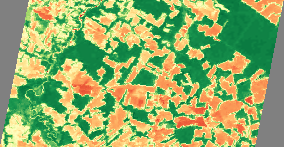
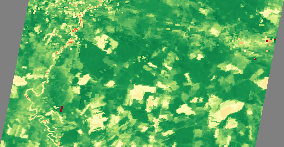
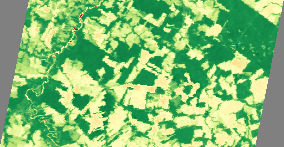

In [5]:
# view the cube in leaflet
sits_view(sinop_cube, bands = "NDVI", dates = c("2013-09-14", "2014-02-02", "2014-07-12"))

In [6]:
# What is the timeline of the cube?
sits_timeline(sinop_cube)

[1] "2013-09-14" "2013-10-16" "2013-11-17" "2013-12-19" "2014-01-17"
 [6] "2014-02-18" "2014-03-22" "2014-04-23" "2014-05-25" "2014-06-26"
[11] "2014-07-28" "2014-08-29"

## Using time series data
<hr style="border:1px solid #0077b9;">

The `sits` package requires a set of time series data, describing properties in spatiotemporal locations of interest. These samples are used to train machine learning models that will be sed to classify a data cube. The time series data is stored in a tabular data structure. The example below shows a table with 1,218 time series obtained from MODIS MOD13Q1 images.  Each series has four attributes: two bands ("NIR" and "MIR") and two indexes ("NDVI" and "EVI"). This data set is available in package `sitsdata`.

This data set was used in the papers ["Big earth observation time series analysis for monitoring Brazilian agriculture"](https://doi.org/10.1016/j.isprsjprs.2018.08.007) and ["Land use and cover maps for Mato Grosso State in Brazil from 2001 to 2017"](https://www.nature.com/articles/s41597-020-0371-4).

In [7]:
# load the dataset "samples_modis_ndvi"
data("samples_modis_ndvi", package = "sits")

# print time series metadata
print(samples_modis_ndvi[1:3,])

# A tibble: 3 × 7
  longitude latitude start_date end_date   label   cube    time_series      
      <dbl>    <dbl> <date>     <date>     <chr>   <chr>   <list>           
1     -55.2   -10.8  2013-09-14 2014-08-29 Pasture MOD13Q1 <tibble [12 × 2]>
2     -57.8    -9.76 2006-09-14 2007-08-29 Pasture MOD13Q1 <tibble [12 × 2]>
3     -51.9   -13.4  2014-09-14 2015-08-29 Pasture MOD13Q1 <tibble [12 × 2]>


> Time series are stored in a table that contains data and metadata. The first six columns contain spatial and temporal information, the label assigned to the sample, and the origin data cube. The `time_series` column contains the time series data. This data is also organized as a table, with a column with the dates and the other columns with the values for each spectral band.

In [8]:
# print three instances of the time series for the first location
print(samples_modis_ndvi[1,]$time_series[[1]])

# A tibble: 12 × 2
   Index       NDVI
   <date>     <dbl>
 1 2013-09-14 0.388
 2 2013-10-16 0.527
 3 2013-11-17 0.677
 4 2013-12-19 0.794
 5 2014-01-17 0.797
 6 2014-02-18 0.153
 7 2014-03-22 0.700
 8 2014-04-23 0.706
 9 2014-05-25 0.606
10 2014-06-26 0.494
11 2014-07-28 0.417
12 2014-08-29 0.442


In [9]:
# The table contains samples with different labels.
# Show a summary of the labels
library(tibble)
summary(samples_modis_ndvi)

label,count,prop
<chr>,<int>,<dbl>
Cerrado,379,0.3111658
Forest,131,0.1075534
Pasture,344,0.2824302
Soy_Corn,364,0.2988506


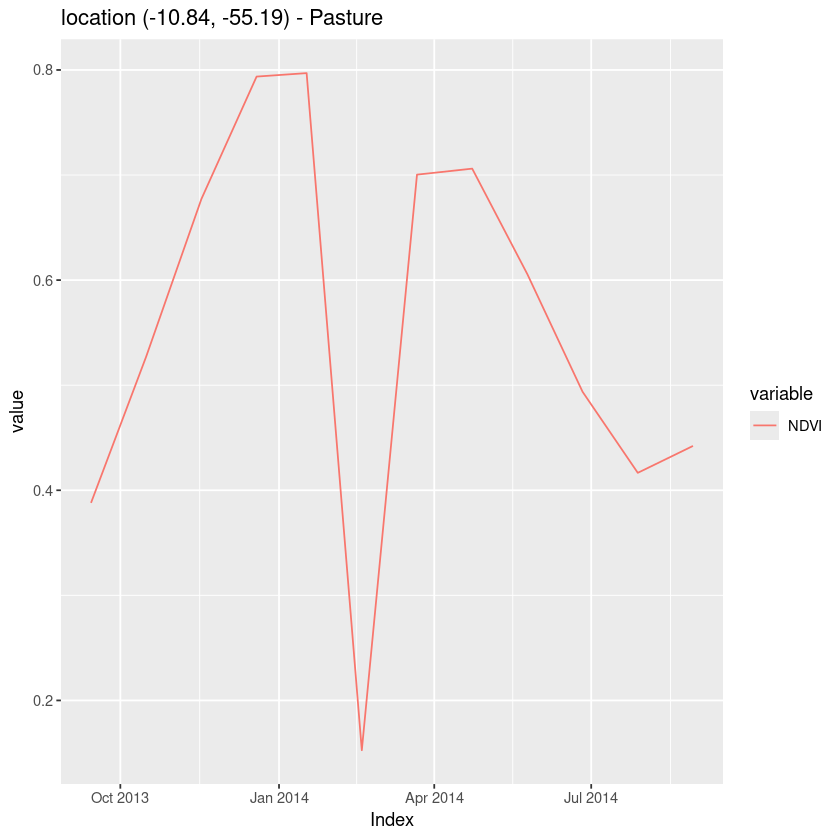

In [10]:
plot(samples_modis_ndvi[1,])

> To visualize the dispersion of the time series, use `plot()`. The example label ("Forest") and one index ("EVI") to show. The resulting plot shows all of the time series associated to the label and attribute, highlighting the median and the first and third quartiles. 

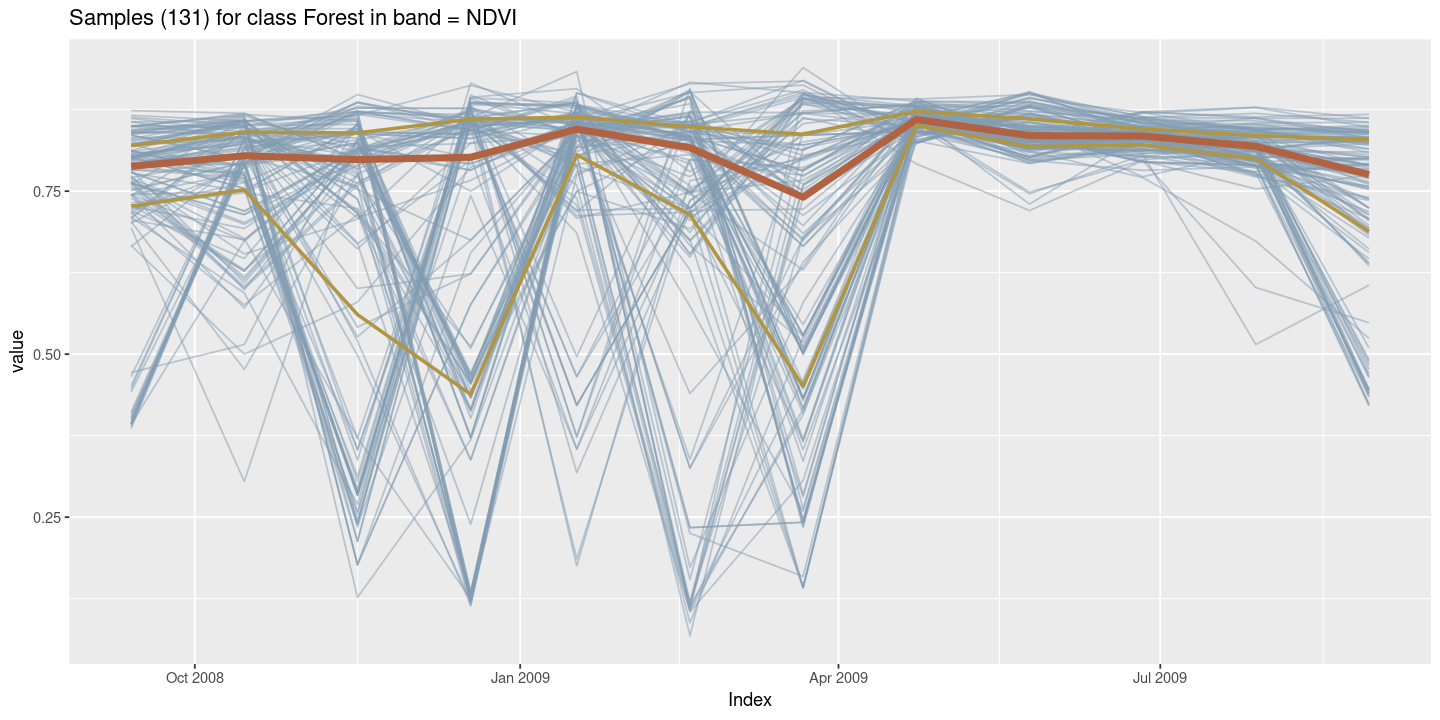

In [11]:
# Filter for label "Forest"
samples_forest <- dplyr::filter(samples_modis_ndvi, label == "Forest")

# control the output
options(repr.plot.width = 12, repr.plot.height = 6)
plot(samples_forest)

In [12]:
# To see the spatial distribution of samples, use sits_view()
sits_view(samples_forest)

HTML widgets cannot be represented in plain text (need html)

## Training a machine learning model
<hr style="border:1px solid #0077b9;">

After obtaining the time series, the next step is to select a suitable subset to use as training samples for a machine learning model. For more details on the machine learning methods please see [Chapter 5 of the sits book](https://e-sensing.github.io/sitsbook/machine-learning-for-data-cubes-using-the-sits-package.html). 
Time series data has four attributes (`"EVI"`, `"NDVI"`, `"NIR"`, `"MIR"`). Data cube has only from the `"NDVI"` index.

In [13]:
# select the bands "ndvi"
samples_1band <- sits_select(samples_modis_ndvi, bands = "NDVI")

# what are the selected bands
sits_bands(samples_1band)

[1] "NDVI"

In [14]:
# train a random forest model
rfor_model <- sits_train(
    samples = samples_1band,
    ml_method = sits_rfor()
)

## Data cube classification
<hr style="border:1px solid #0077b9;">

The next step is to classify the data cube. This is achieved by using the `sits_classify()` function. The classification produces a set of probability maps, one for each class. For each map, the value of a pixel is proportional to the the probability that it belongs to the class.  Details of the classification process are available in [Chapter 6](https://e-sensing.github.io/sitsbook/classification-of-images-in-data-cubes-using-satellite-image-time-series.html). 

In [15]:
# classify the raster image
sinop_probs <- sits_classify(data = sinop_cube, 
                             ml_model = rfor_model,
                             multicores = 2,
                             memsize = 1,
                             output_dir = ".")

  |======================================================================| 100%


To visualize the result, we plot the probability maps.

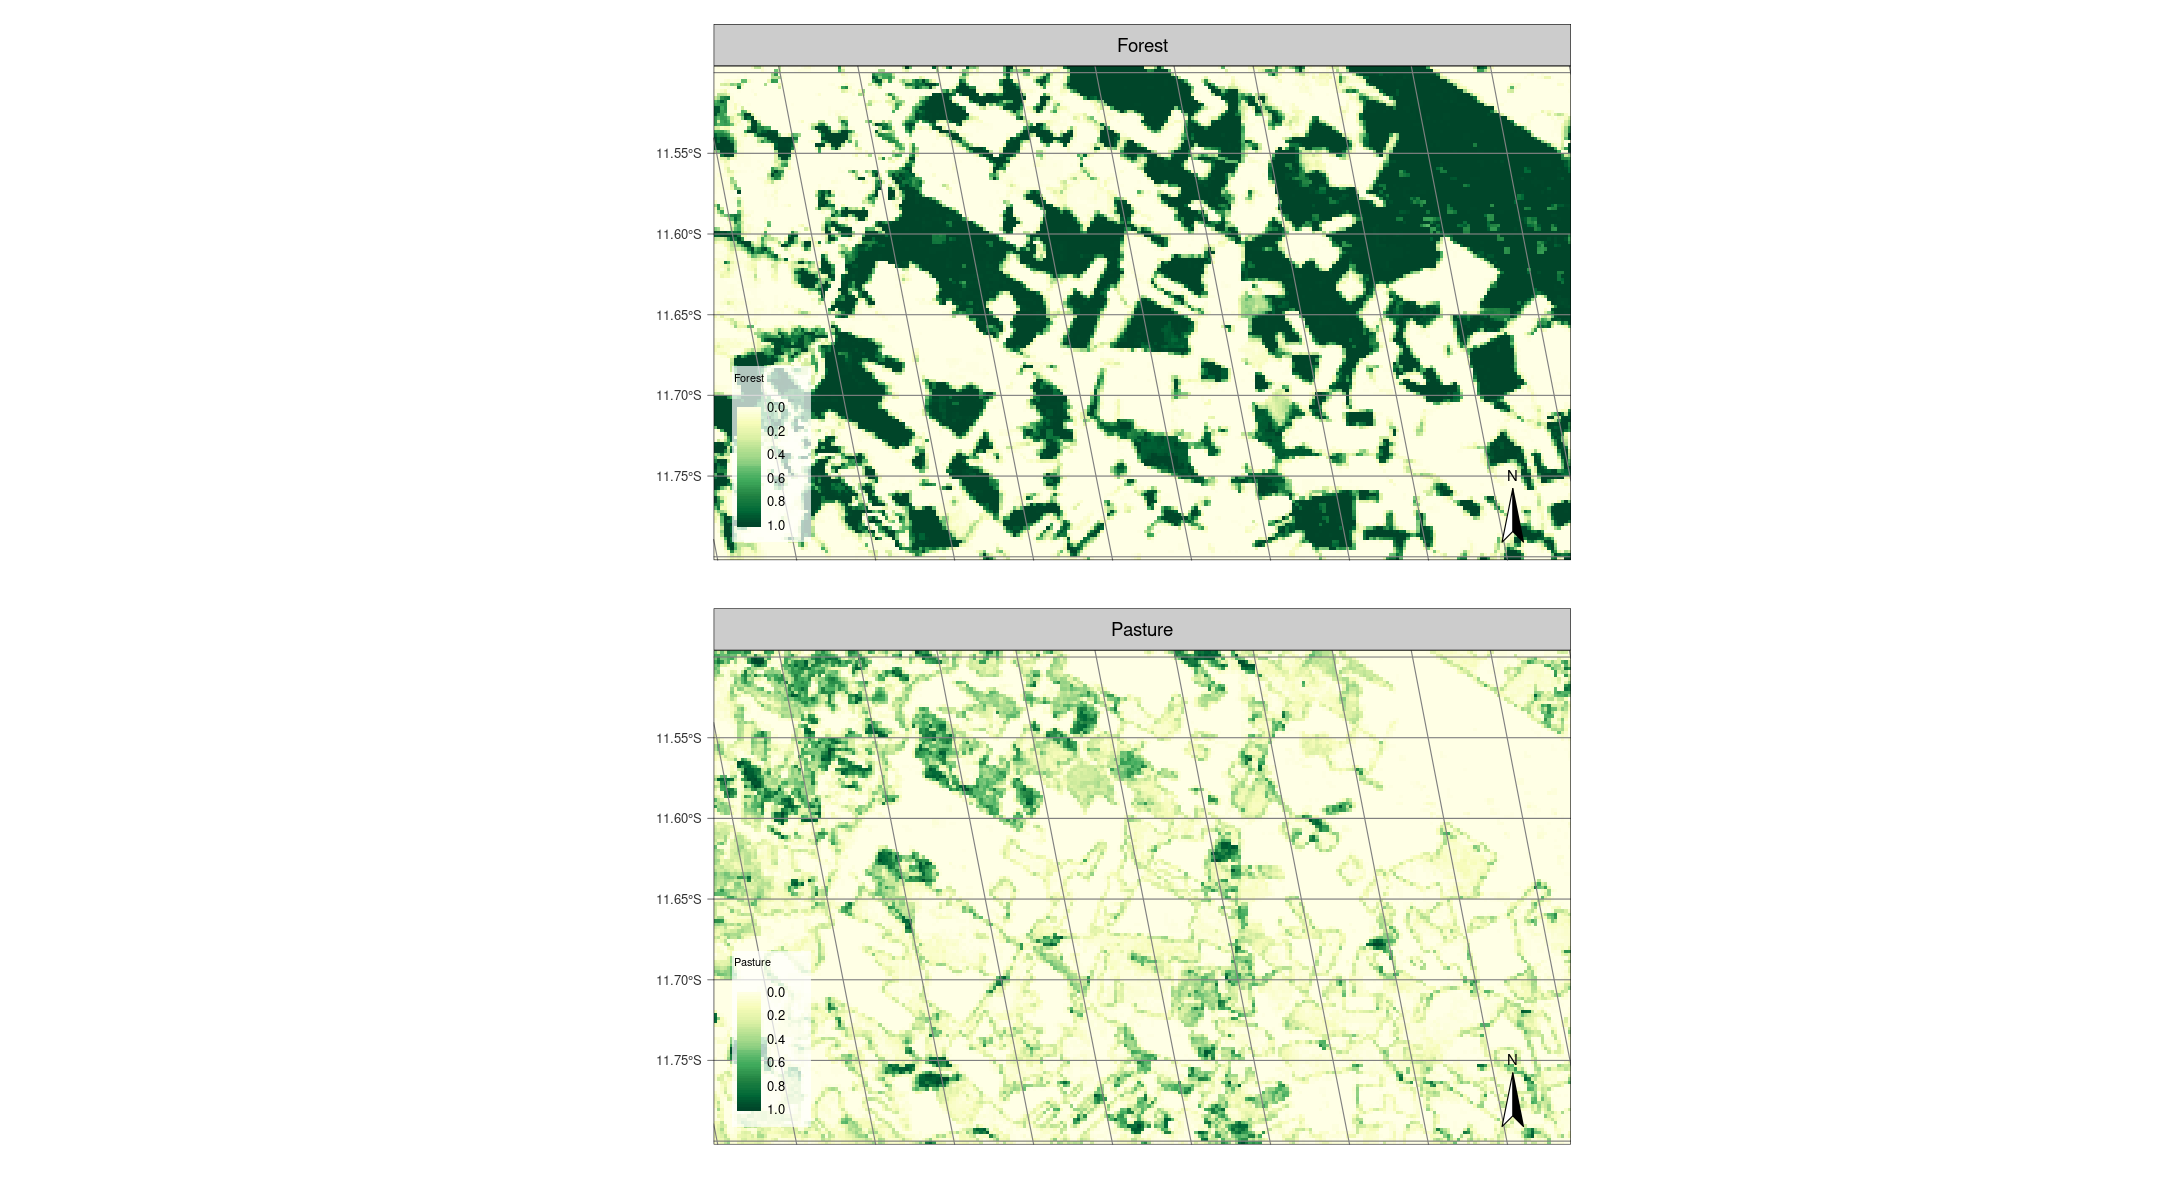

In [16]:
# show the maps of two classes ("Forest" and "Pasture").
options(repr.plot.width = 18, repr.plot.height = 10)

plot(sinop_probs, labels = c("Forest", "Pasture"))

## Post-processing with spatial smoothing
<hr style="border:1px solid #0077b9;">
When working with big EO data sets, there is a considerable degree of data variability in each class. As a result, some pixels will be misclassified. These errors are more likely to occur in transition areas between classes or when dealing with mixed pixels. To offset these problems, `sits` includes a post-processing smoothing method based on Bayesian probability. The `sits_smooth()` function uses information from a pixel's neighborhood to reduce uncertainty about its label, which is illustrated below.

In [17]:
# perform spatial smoothing
sinop_smooth <- sits_smooth(sinop_probs, 
                            multicores = 2, 
                            memsize = 1,
                            output_dir = ".")

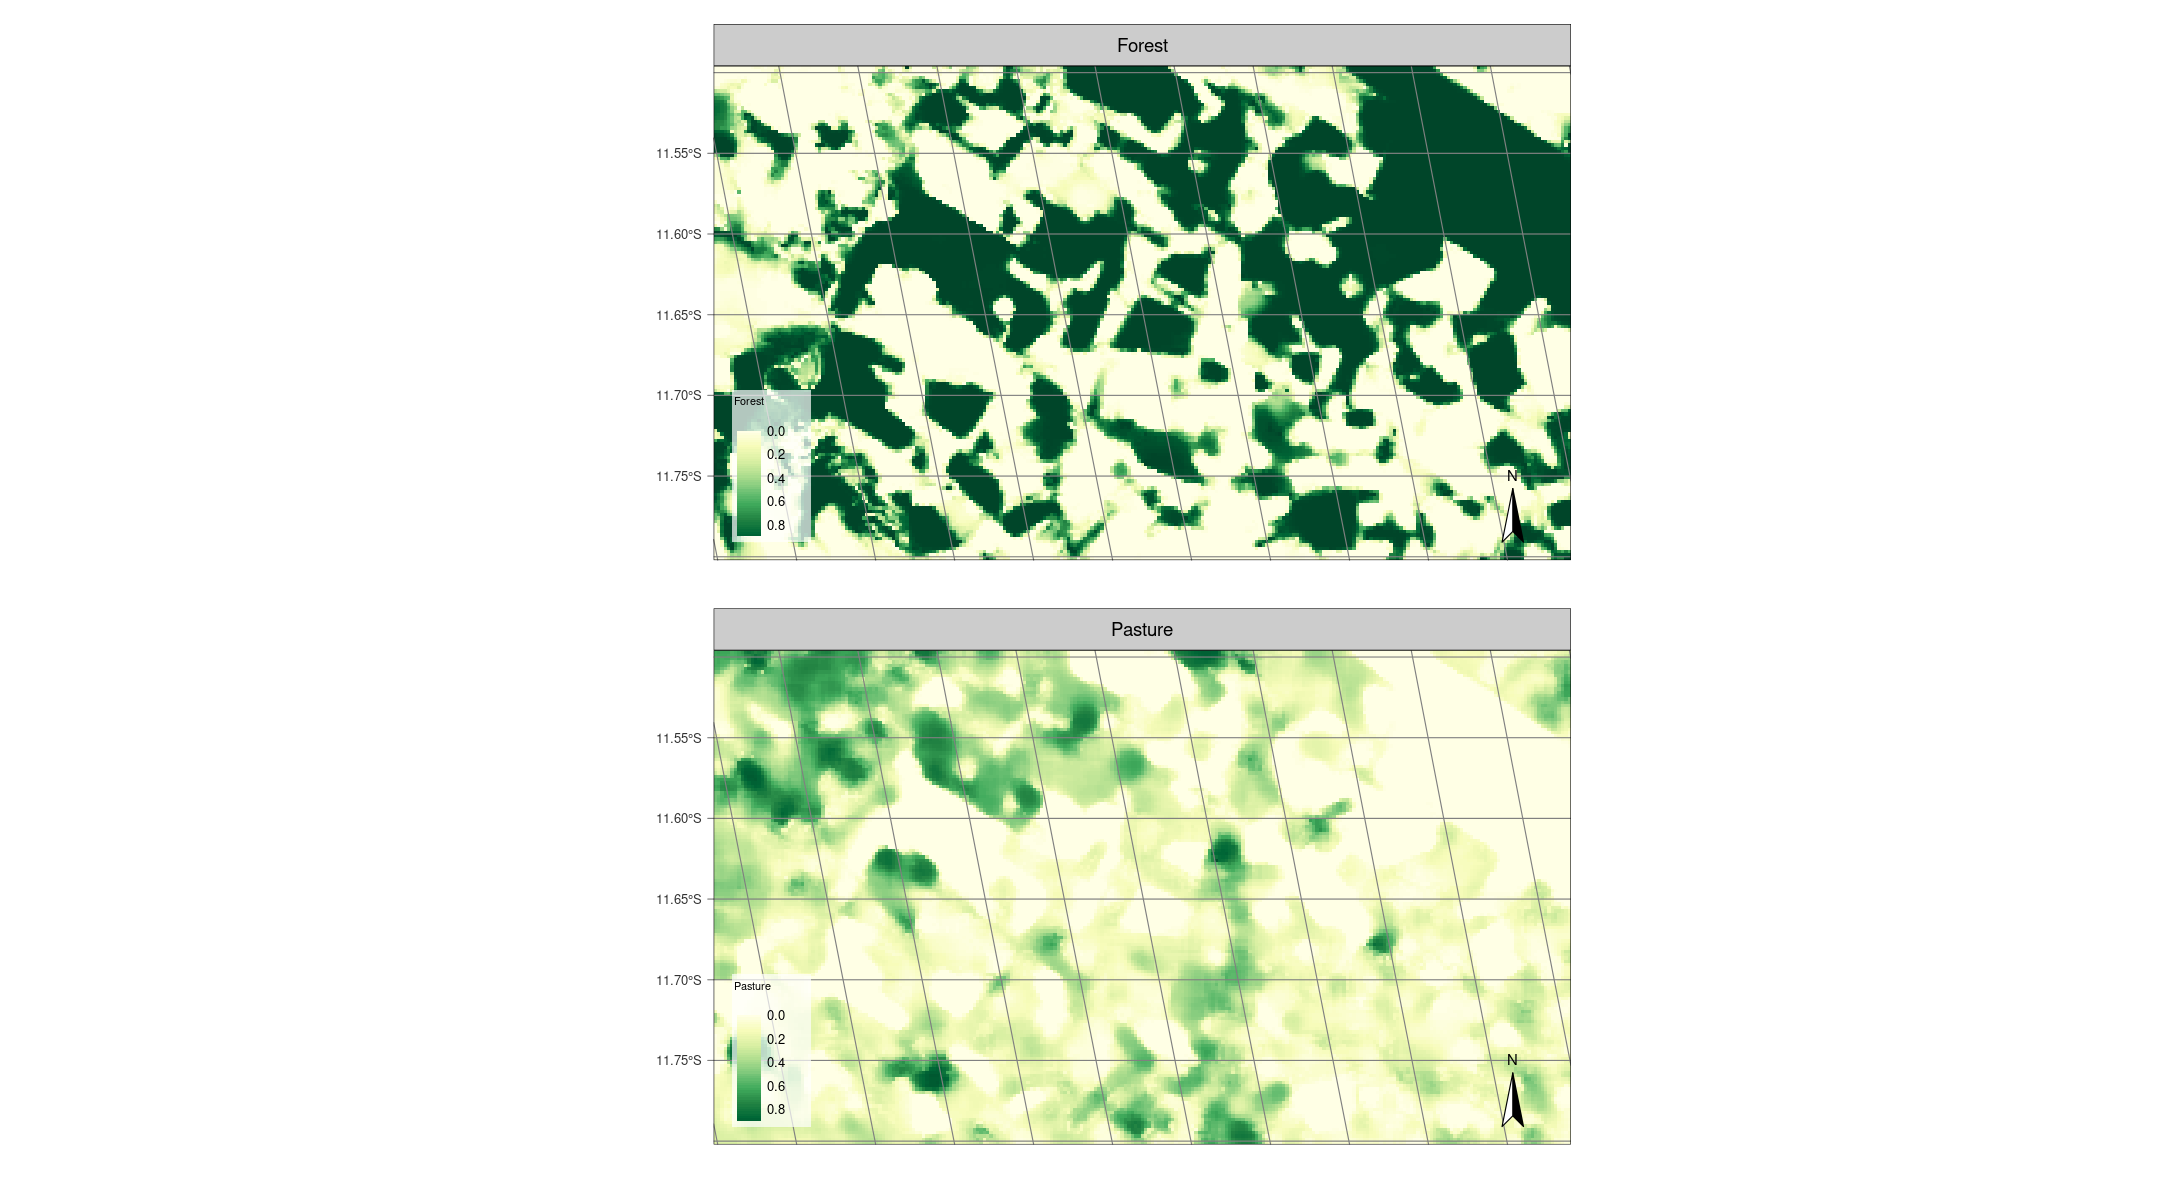

In [18]:
# plot the smooth probability maps
plot(sinop_smooth, labels = c("Forest", "Pasture"))

## Producing the final classification map
<hr style="border:1px solid #0077b9;">

In [19]:
# selecting the class with higher probability for each pixel
sinop_label <- sits_label_classification(sinop_smooth,
                                         multicores = 2,
                                         memsize = 1,
                                         output_dir = ".")

  |======================================================================| 100%


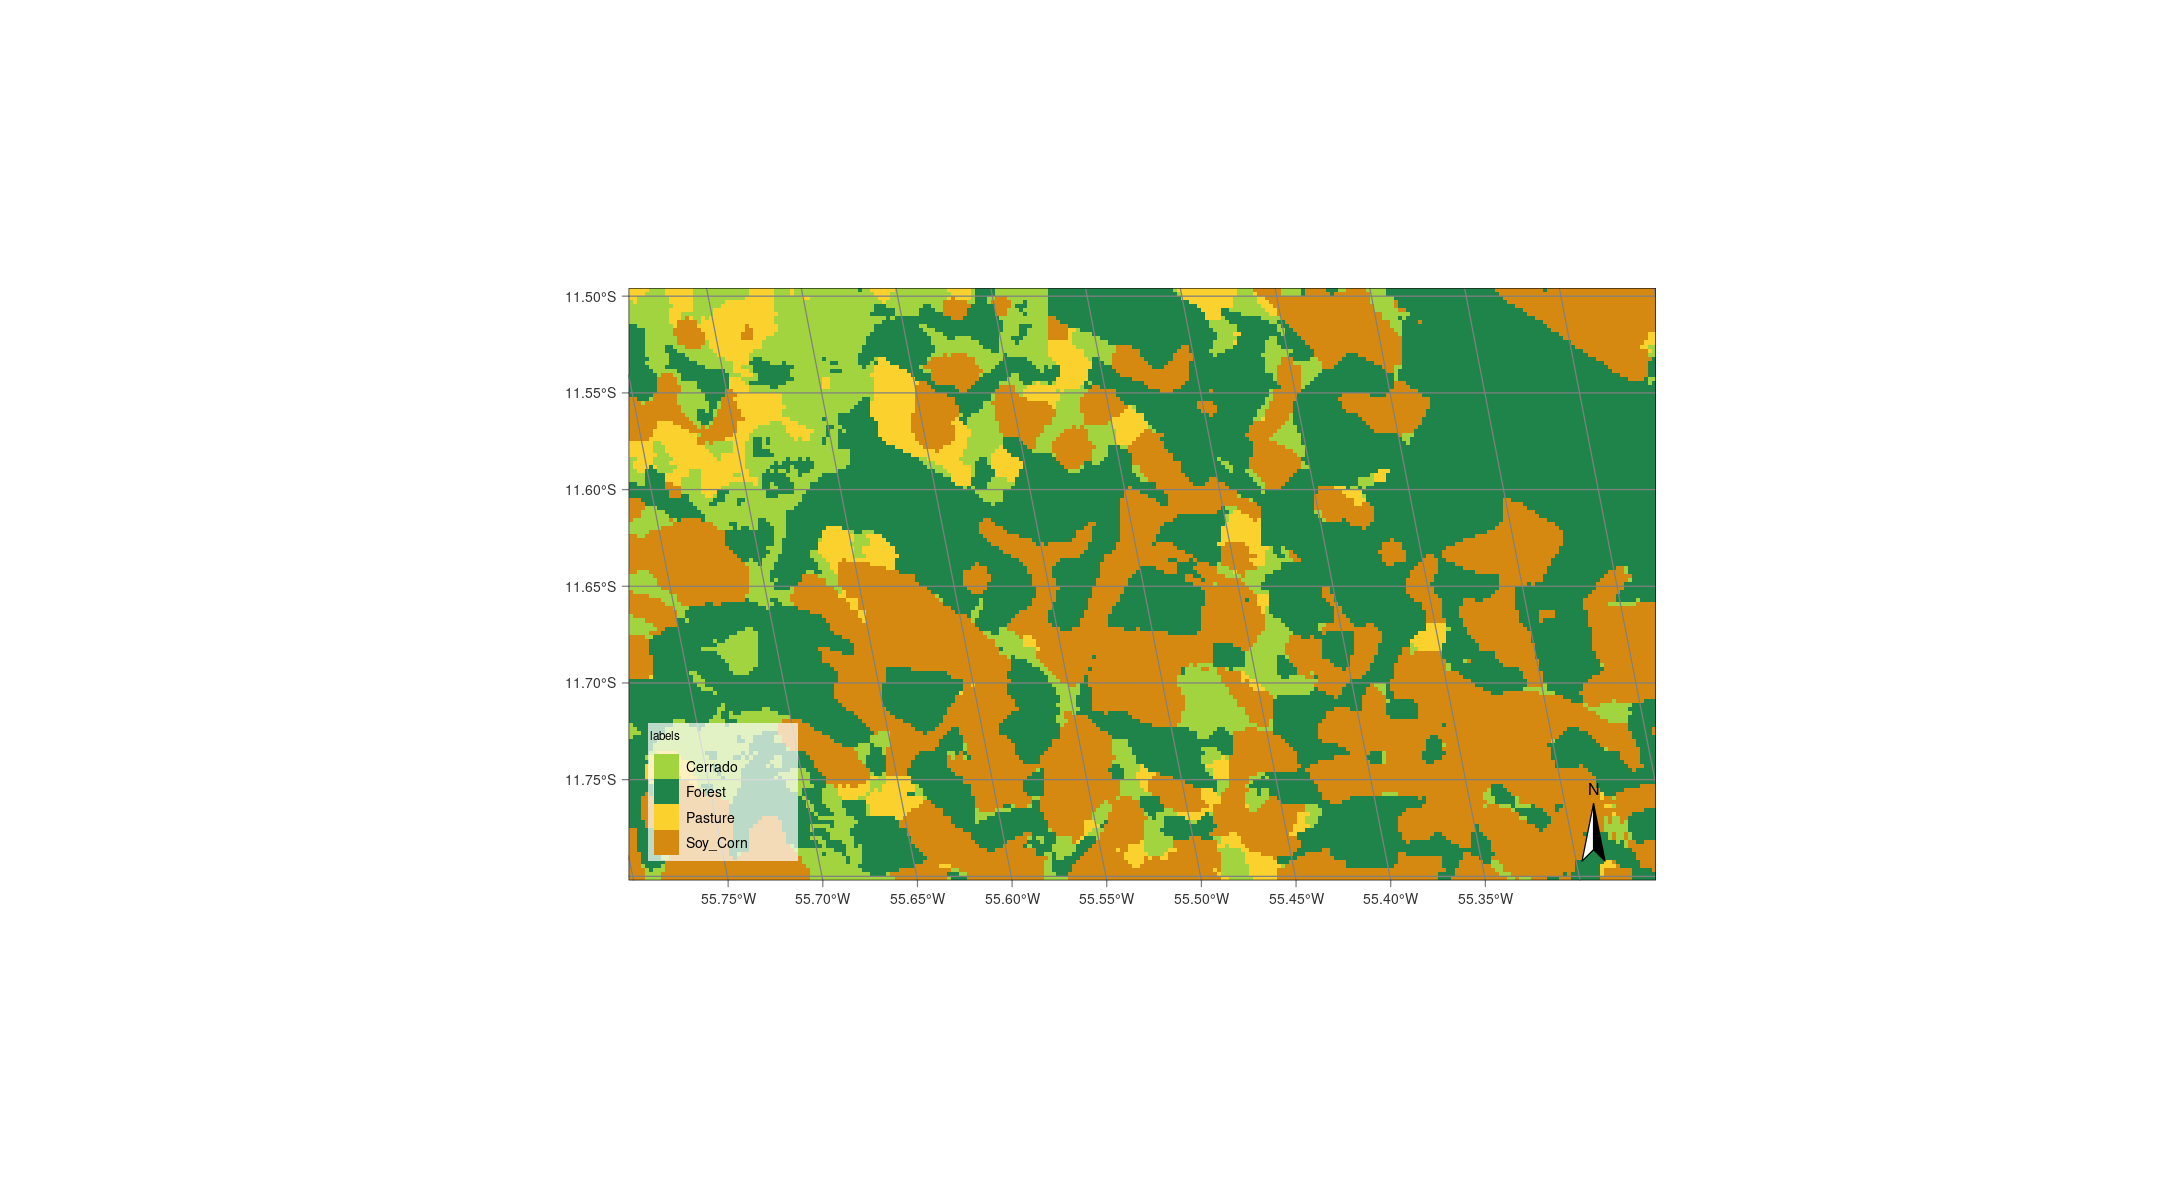

In [20]:
# plot the final map
plot(sinop_label, title = "Sinop-label")

In [21]:
print(sinop_label$file_info[[1]])

# A tibble: 1 × 12
  band  start_date end_date   ncols nrows  xres  yres      xmin     xmax    ymin
  <chr> <date>     <date>     <dbl> <dbl> <dbl> <dbl>     <dbl>    <dbl>   <dbl>
1 class 2013-09-14 2014-08-29   255   147  232.  232. -6073798.  -6.01e6 -1.31e6
# ℹ 2 more variables: ymax <dbl>, path <chr>


> The resulting classification files can be read by QGIS. Links to the  associated files are available in the column `file_info`.

## Hands-on
<hr style="border:1px solid #0077b9;">

In [22]:
# directory where files are located
data_dir <- system.file("extdata/Rondonia-20LMR", package = "sitsdata")